#Handwritten Digit Recognotion using Deep Learning CNN Architecture

###Using 3 types of Layer
- Convultional : To extract feature
- Pooling : Optimizing size( In this case Reducing size)
- Dense  



Import Libraries

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import seaborn as sb
import random as rd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, confusion_matrix

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


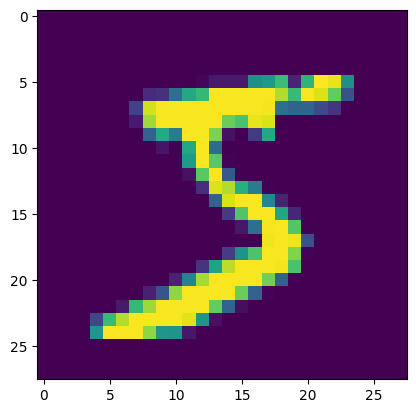

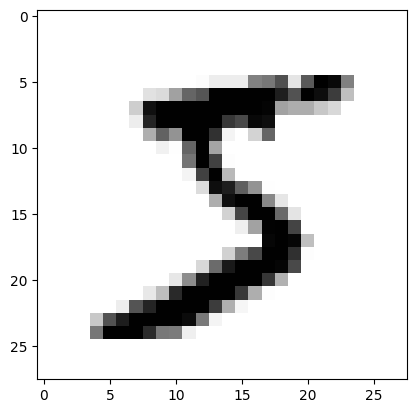

In [5]:
x_train.shape
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap = plt.cm.binary)

###Normalizing Data

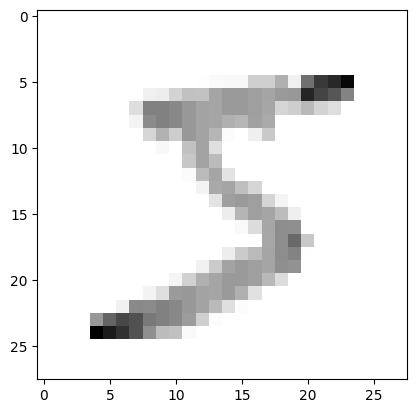

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

###Resizing Image

In [7]:
img_size=28
x_trainr = np.array(x_train).reshape(-1,img_size,img_size,1)  #increased dimenstion for krenal operation
x_testr = np.array(x_test).reshape(-1,img_size,img_size,1)
print(x_trainr.shape)
x_testr.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

###Neural Network

In [13]:
model = Sequential()

model.add(Conv2D (64, (3,3), input_shape = x_trainr.shape[1:])) ### only for first convolution Layer to mention input Layer size
model.add(Activation ("relu")) # activation funtion to make it non-linear, <e, remove, >e
model.add(MaxPooling2D(pool_size=(2,2))) ## MAxpooling single maximum value of 2x2,

# 2nd Convolution Layer 26-3+1= 24*24
model.add(Conv2D (64, (3,3))) ## 2nd Convolution Layer
model.add(Activation("relu")) ## activation funtion
model.add(MaxPooling2D(pool_size=(2,2))) ## MAxpooling


# 3rd Convolution Layer
model.add(Conv2D (64, (3,3))) # 24*24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



# Fully Connected Layer # 1 20x20= 400
model.add (Flatten()) ### before using fully connected Layer, need to be flatten so that 20 to 10
model.add (Dense (64)) #
model.add(Activation("relu"))


# Fully Connected Layer #2
model.add (Dense (32))
model.add(Activation("relu"))


# Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense (10)) ## this last dense Layer must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to Softmax (Class probabilites )

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_5 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_6 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [20]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =['accuracy'])

In [21]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3 )

Epoch 1/5
1313/1313 [==============================] - 74s 55ms/step - loss: 0.3473 - accuracy: 0.8918 - val_loss: 0.1200 - val_accuracy: 0.9641
Epoch 2/5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.1096 - accuracy: 0.9669 - val_loss: 0.1089 - val_accuracy: 0.9661
Epoch 3/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.1009 - val_accuracy: 0.9708
Epoch 4/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0711 - val_accuracy: 0.9790
Epoch 5/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.0650 - val_accuracy: 0.9820


In [22]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples, ", test_loss)
print("Test Validation accuracy on 10,000 test samples, ", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0632 - accuracy: 0.9822
Test loss on 10,000 test samples,  0.06317577511072159
Test Validation accuracy on 10,000 test samples,  0.982200026512146


In [24]:
predictions = model.predict([x_testr])

313/313 [==============================] - 5s 15ms/step


In [25]:
print(predictions)

[[5.20953620e-07 3.00833053e-05 5.85488579e-06 ... 9.99945462e-01
  3.12505722e-06 1.12462640e-05]
 [5.04942192e-03 1.51372160e-05 9.94920492e-01 ... 1.95856316e-07
  4.16478770e-06 3.33381479e-07]
 [6.12627048e-07 9.99980986e-01 2.41233943e-06 ... 3.02497682e-07
  1.11081908e-06 1.95587049e-08]
 ...
 [5.69211693e-07 2.15811866e-08 4.05852120e-07 ... 3.99261171e-06
  3.10589849e-06 6.65642874e-05]
 [7.93291256e-04 5.30945314e-08 1.14219478e-08 ... 6.92170715e-07
  2.65182869e-04 1.16888605e-05]
 [4.02384103e-06 6.56300983e-07 3.94483266e-07 ... 2.74423012e-10
  1.14198201e-07 1.82339388e-08]]


In [28]:
print(np.argmax(predictions[500]))

3


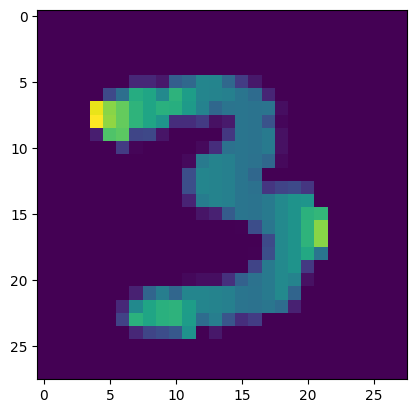

In [29]:
plt.imshow(x_test[500])